<center><h1 style="color:cyan;"><strong>Multiple Linear Regression</strong></h1></center>

Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../dataset.csv")

In [3]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2005,1,2.53,4.31,2248.44
1,2005,2,7.46,8.39,1377.37
2,2005,3,5.07,6.26,1783.36
3,2005,4,7.06,6.64,1757.98
4,2005,5,8.85,9.17,1188.28


In [4]:
df.drop(columns=["year","month"],axis=1,inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.53,4.31,2248.44
1,7.46,8.39,1377.37
2,5.07,6.26,1783.36
3,7.06,6.64,1757.98
4,8.85,9.17,1188.28


Correlation beween features

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.838586,-0.912415
unemployment_rate,0.838586,1.000000,-0.858312
index_price,-0.912415,-0.858312,1.000000


Visualize this correlation

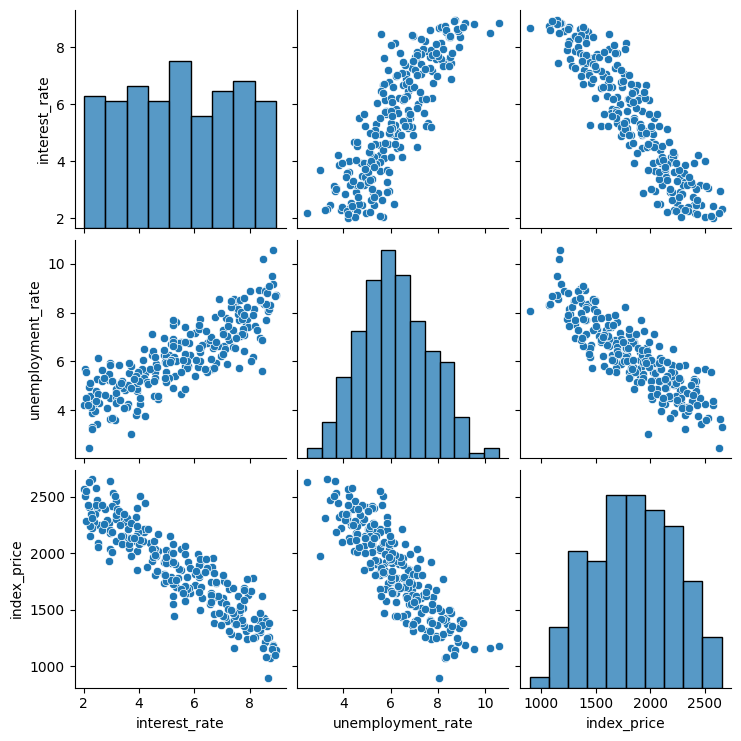

In [9]:
import seaborn as sns
sns.pairplot(df)

Separate X and y Variable

In [8]:
X = df[["interest_rate","unemployment_rate"]]

In [10]:
y = df["index_price"]

Train test split

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
X_test.shape

(72, 2)

Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Create regression model

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

model = reg.fit(X_train,y_train)

Predict our data

In [18]:
y_pred = model.predict(X_test)

Draw scatter plot for ytest and ypred

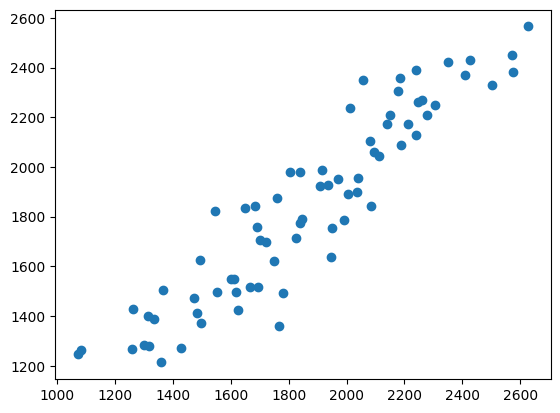

In [19]:
plt.scatter(y_test,y_pred)

In [29]:
model.coef_

array([-256.57355875, -114.74905689])

Performance metrics

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [22]:
print("Mean squared error: ",mse)
print("Mean absoulute error: ",mae)
print("Root mean squared error: ",np.sqrt(mse))

Mean squared error:  19884.008705920543
Mean absoulute error:  113.38008638866356
Root mean squared error:  141.01066876630486


R2 score

In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [28]:
score

0.8556380320769573

<h3>OLS technique</h3>

In [24]:
import statsmodels.api as s 
mdl = s.OLS(y_train,X_train).fit()
prd = mdl.predict(X_test)

In [26]:
print(mdl.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.036
Model:                            OLS   Adj. R-squared (uncentered):              0.025
Method:                 Least Squares   F-statistic:                              3.125
Date:                Sun, 08 Feb 2026   Prob (F-statistic):                      0.0465
Time:                        20:38:49   Log-Likelihood:                         -1501.7
No. Observations:                 168   AIC:                                      3007.
Df Residuals:                     166   BIC:                                      3014.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------